In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from Ipython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.formate(css))

In [2]:
titles = pd.read_csv('titles.csv',index_col=None)
titles.head()

,title,year
0,Tasveer Mere Sanam,1996
1,Only You,1994
2,El pueblo del terror,1970
3,Machine,2007
4,MARy,2008


In [3]:
cast = pd.read_csv('cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


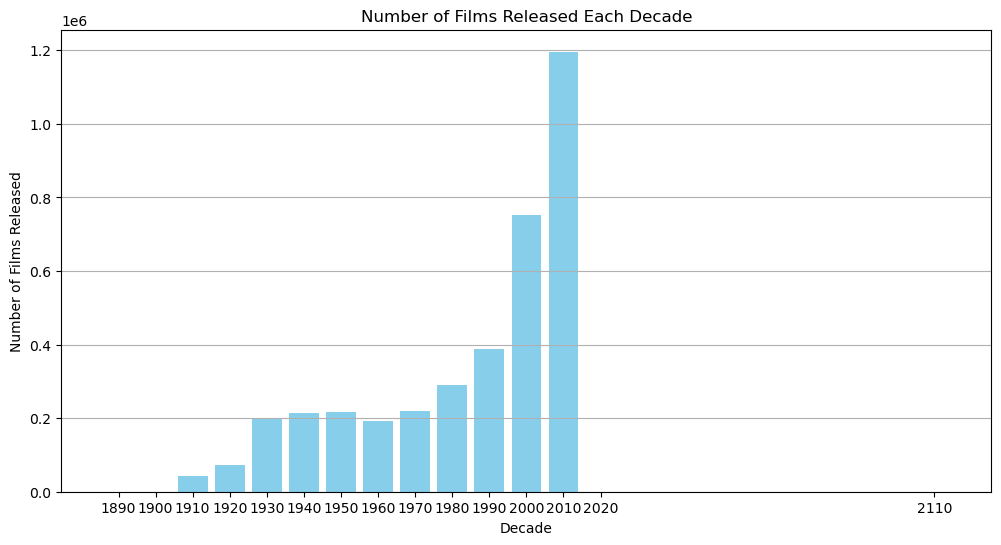

In [5]:
cast['decade'] = (cast['year'] // 10) * 10

# Group by decade and count the number of films in each decade
films_per_decade = cast.groupby('decade').size()

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(films_per_decade.index, films_per_decade.values, width=8, color='skyblue')
plt.xlabel('Decade')
plt.ylabel('Number of Films Released')
plt.title('Number of Films Released Each Decade')
plt.xticks(films_per_decade.index)
plt.grid(axis='y')
plt.show()

C:\Users\fahee\AppData\Local\Temp\ipykernel_8488\3737285072.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hamlet_movies['decade'] = (hamlet_movies['year'] // 10) * 10


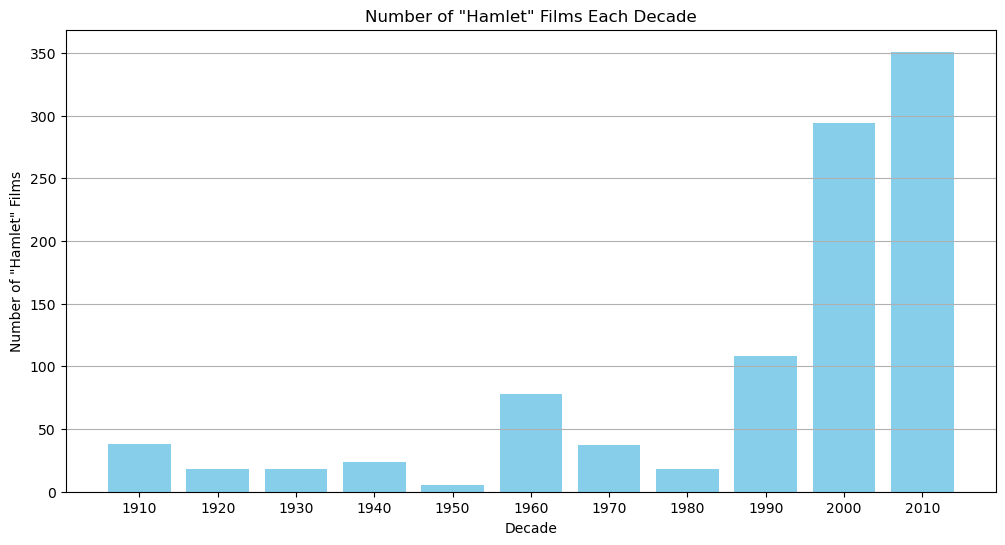

In [7]:
hamlet_movies = cast[cast['title'].str.contains('Hamlet', case=False, na=False)]

# Calculate the decade for each "Hamlet" movie
hamlet_movies['decade'] = (hamlet_movies['year'] // 10) * 10

# Group by decade and count the number of "Hamlet" films in each decade
hamlet_per_decade = hamlet_movies.groupby('decade').size()

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(hamlet_per_decade.index, hamlet_per_decade.values, width=8, color='skyblue')
plt.xlabel('Decade')
plt.ylabel('Number of "Hamlet" Films')
plt.title('Number of "Hamlet" Films Each Decade')
plt.xticks(hamlet_per_decade.index)
plt.grid(axis='y')
plt.show()

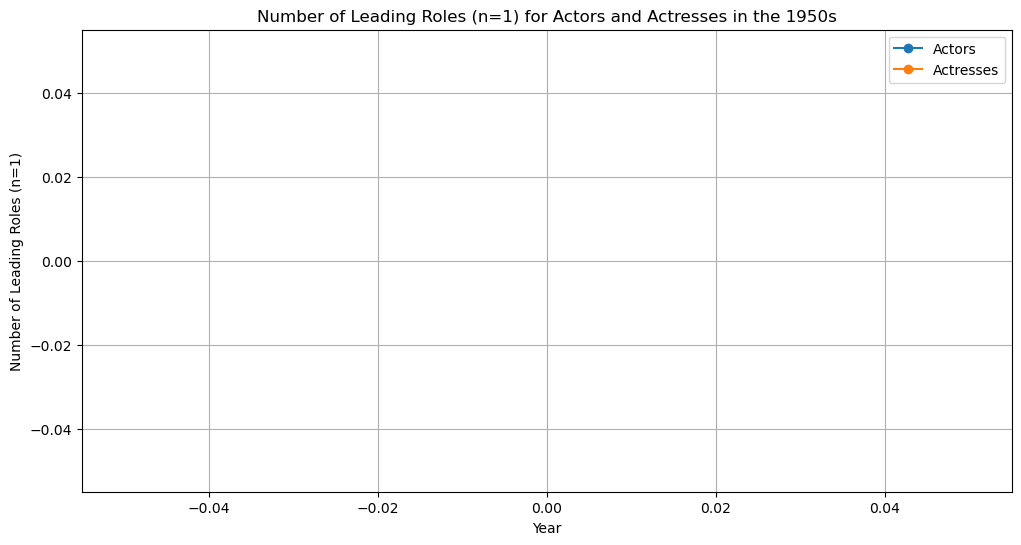

In [37]:
leading_roles_1950s = cast[(cast['character'] == 'lead') | (cast['title'] == 'leading')]
leading_roles_1950s = leading_roles_1950s[leading_roles_1950s['year'].between(1950, 1959)]

# Count leading roles for actors by year
actors_by_year = leading_roles_1950s[leading_roles_1950s['n'].notna()].groupby('year').size()

# Count leading roles for actresses by year
actresses_by_year = leading_roles_1950s[leading_roles_1950s['n'].notna()].groupby('year').size()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(actors_by_year.index, actors_by_year.values, label='Actors', marker='o')
plt.plot(actresses_by_year.index, actresses_by_year.values, label='Actresses', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Leading Roles (n=1)')
plt.title('Number of Leading Roles (n=1) for Actors and Actresses in the 1950s')
plt.legend()
plt.grid(True)
plt.show()

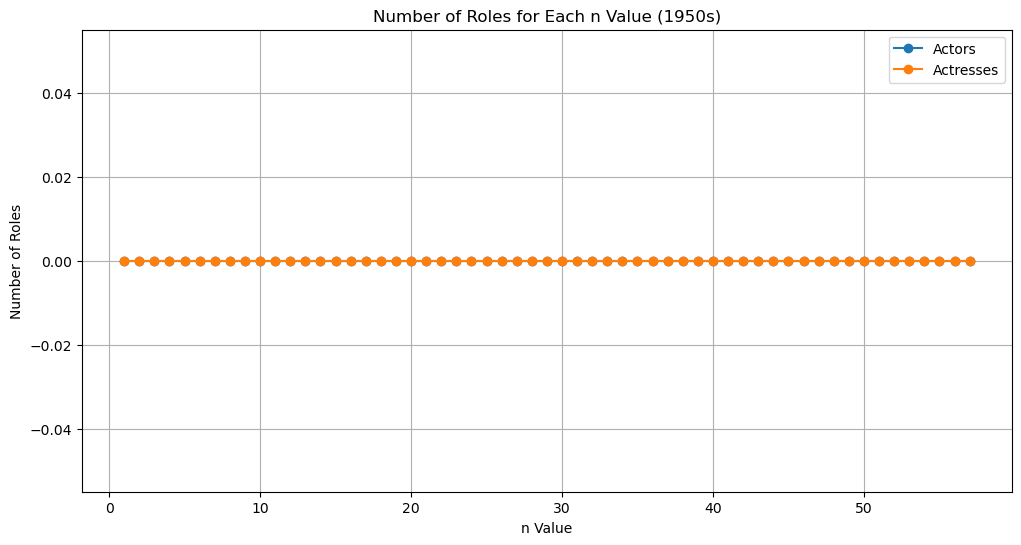

In [39]:
roles_1950s = cast[cast['year'].between(1950, 1959)]

# Initialize dictionaries to store counts for actors and actresses
actors_count_by_n = {}
actresses_count_by_n = {}

# Iterate through "n" values from 1 to 57
for n in range(1, 58):
    # Count roles for actors for the current "n"
    actors_count = roles_1950s[(roles_1950s['n'].notna()) & (roles_1950s['character'] == f'n={n}')].shape[0]
    actors_count_by_n[n] = actors_count

    # Count roles for actresses for the current "n"
    actresses_count = roles_1950s[(roles_1950s['n'].notna()) & (roles_1950s['character'] == f'n={n}')].shape[0]
    actresses_count_by_n[n] = actresses_count

# Plotting
n_values = list(range(1, 58))
plt.figure(figsize=(12, 6))
plt.plot(n_values, [actors_count_by_n[n] for n in n_values], label='Actors', marker='o')
plt.plot(n_values, [actresses_count_by_n[n] for n in n_values], label='Actresses', marker='o')
plt.xlabel('n Value')
plt.ylabel('Number of Roles')
plt.title('Number of Roles for Each n Value (1950s)')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
roles_per_movie = cast.groupby('title')['character'].count().reset_index()

# Display the number of roles for each Pink Panther movie
print(roles_per_movie)

                               title  character
0                   #1 Serial Killer         30
1                               #211          8
2                                 #5          2
3                         #50Fathers         40
4                                #66         14
...                              ...        ...
182669  whiteonwhite:algorithmicnoir          2
182670                   www.XXX.com          5
182671                           xXx         72
182672    xXx: Return of Xander Cage        107
182673       xXx: State of the Union        133

[182674 rows x 2 columns]


In [25]:
frank_oz_multiple_roles = cast[(cast['name'] == 'Frank Oz')].groupby(['title', 'year']).filter(lambda x: len(x) > 1)

# Sort the films by year
frank_oz_multiple_roles_sorted = frank_oz_multiple_roles.sort_values(by='year')

# Display the films in order by year
print(frank_oz_multiple_roles_sorted[['title', 'year']].drop_duplicates())

                                        title  year
1723652                      The Muppet Movie  1979
1723598        An American Werewolf in London  1981
1723637                The Great Muppet Caper  1981
1723629                      The Dark Crystal  1982
1723659            The Muppets Take Manhattan  1984
1723601                      Follow That Bird  1985
1723643            The Muppet Christmas Carol  1992
1723611                Muppet Treasure Island  1996
1723626  The Adventures of Elmo in Grouchland  1999
1723612                    Muppets from Space  1999


In [30]:
frank_oz_characters_twice_or_more = cast[(cast['name'] == 'Frank Oz') & (cast[''] >= 2)]

# Display the characters portrayed at least twice by Frank Oz
print(frank_oz_characters_twice_or_more[['character', 'n']].drop_duplicates())

                                                 character     n
1723598                                        Mr. Collins  13.0
1723599                                         Miss Piggy  13.0
1723600                                             Warden   4.0
1723601                                     Cookie Monster   3.0
1723602                                               Bert   3.0
1723603                                             Grover   3.0
1723604                                        Pathologist  21.0
1723605                            Subconscious Guard Dave  14.0
1723606                                        The Wiseman  17.0
1723607                                             Fungus   9.0
1723608                                         Miss Piggy  14.0
1723609                                        Fozzie Bear  14.0
1723610                                      Sam the Eagle  14.0
1723611                                             Animal  14.0
1723612                  